### Info
This is the experiment on file ```data/features100k.csv```. This file contains the extracted features from wikimedia data in 2012 (Wikidata toolkit). 

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import tensorflow as tf
from sklearn import manifold

In [2]:
featureNum = 32

isNum = np.ndarray(shape=(32), dtype=np.bool)
for i in range(len(isNum)):
    isNum[i] = True
    
la = True

with open('../../data/vandalism_preprocessed1.csv', newline='') as csvfile:
    data_reader = csv.reader(csvfile)
    firstLine = True
    for row in data_reader:
        if firstLine:
            firstLine = False
        else:
            for i, data in enumerate(row):
                if la:
                    la = False
                try:
                    f = float(data)
                except ValueError:
                    isNum[i] = False

In [3]:
isNum

array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True], dtype=bool)

In [4]:
la = [i for i in range(len(isNum)) if isNum[i]]

In [5]:
with open('../../data/vandalism_preprocessed1.csv', newline='') as csvfile:
    data_reader = csv.reader(csvfile)
    for row in data_reader:
        for i in la:
            print(row[i])
        break


nonLatinRatio
commentTailLength
asciiRatio
whitespaceRatio
upperCaseRatio
itemId
longestWord
languageWordRatio
punctuationRatio
groupId
commentLength
latinRatio
digitRatio
commentSitelinkSimilarity
bracketRatio
commentLabelSimilarity
commentCommentSimilarity
badWordRatio
alphanumericRatio
proportionOfQidAdded
lowerCaseRatio
longestCharacterSequence
upperCaseWordRatio
lowerCaseWordRatio
proportionOfLinksAdded


In [6]:
X = np.ndarray(shape=(100000, len(la)), dtype=np.float32)

with open('../../data/vandalism_preprocessed1.csv', newline='') as csvfile:
    data_reader = csv.reader(csvfile)
    firstLine = True
    for i, row in enumerate(data_reader):
        if firstLine:
            firstLine = False
        else:
            X[i] = [float(row[j]) for j in la]

In [7]:
X[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [8]:
X[1]

array([  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  15.,  -1.,  -1.,  -1.,  16.,
        31.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,
        -1.,  -1.,  -1.,   0.], dtype=float32)

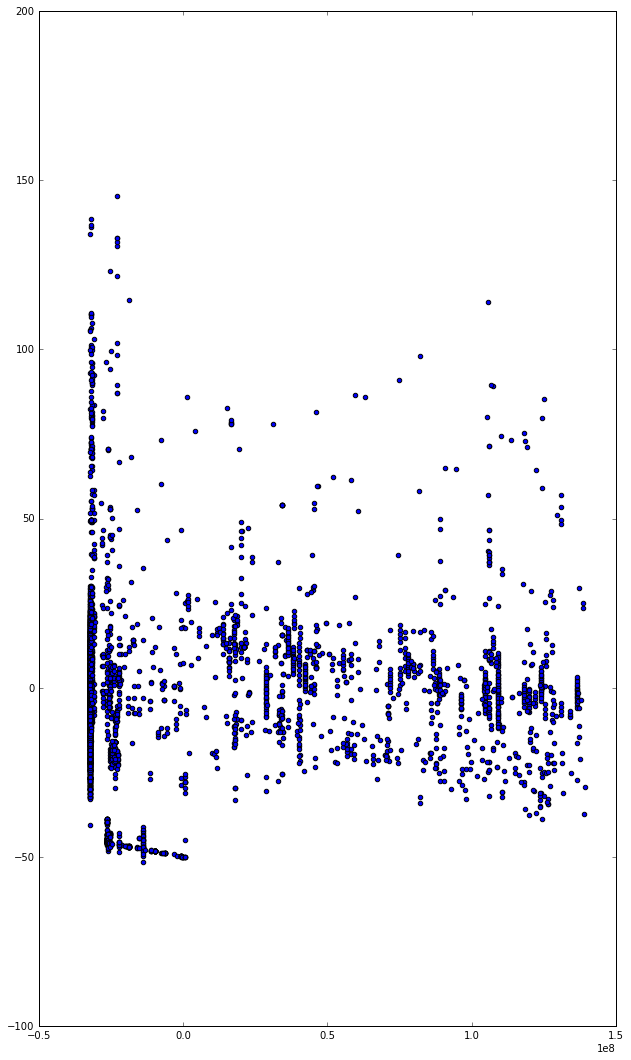

In [28]:
fig = plt.figure(figsize=(60,40))
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
Y = tsne.fit_transform(X[:4000])
ax = fig.add_subplot(2,5,10)
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

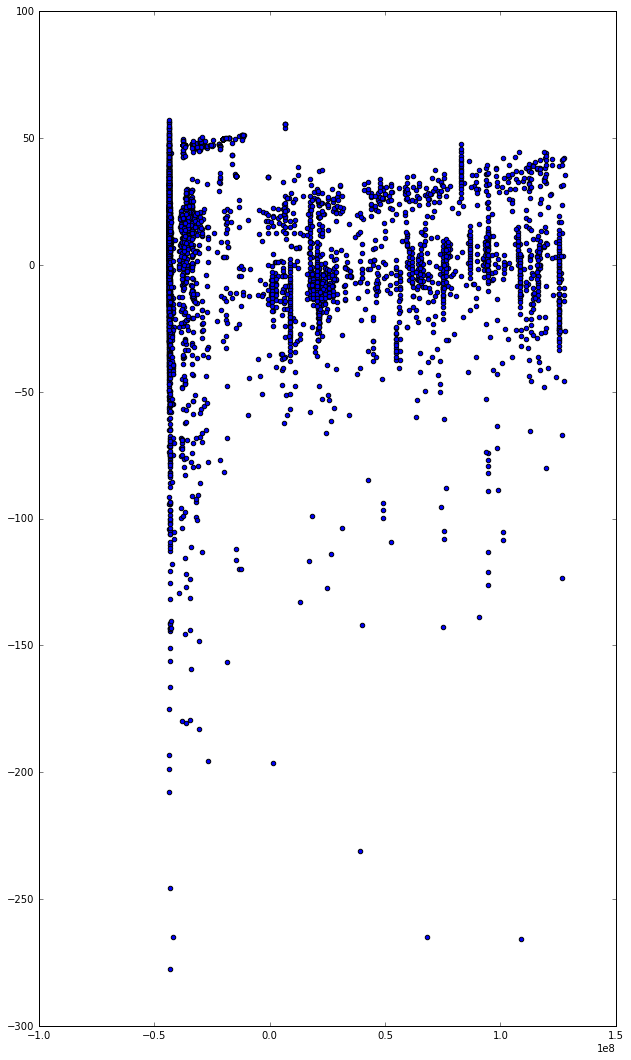

In [29]:
fig = plt.figure(figsize=(60,40))
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
Y = tsne.fit_transform(X[4000:8000])
ax = fig.add_subplot(2,5,10)
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

In [23]:
na = np.array([[1,2,3,4], [1,2,3,4], [1,2,3,4], [1,2,3,4]])

In [24]:
na

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [25]:
np.delete(na, 0, 1)

array([[2, 3, 4],
       [2, 3, 4],
       [2, 3, 4],
       [2, 3, 4]])

In [27]:
X = np.delete(X, 0, 1)

In [35]:
Y = np.ndarray(shape=(100000), dtype=np.float32)
with open('../../data/vandalism_preprocessed1_ground_truth.csv', newline='') as csvfile:
    data_reader = csv.reader(csvfile)
    firstLine = True
    for i, row in enumerate(data_reader):
        if i == 100000:
            break
        if firstLine:
            firstLine = False
        else:
            Y[i] = 1.0 if row[2] == 'true' else 0.0

In [37]:
np.ones(Y)

ValueError: sequence too large; cannot be greater than 32